In [1]:
import numpy as np
import hippo
import cortex
import network
np.random.seed(2016)

### Input Representation

Input $x$ and output $y$ to either network are 20-bit vectors

$_0$ is 1 if the US is present

In [2]:
def construct_io():
    inputs = np.random.rand(20)
    inputs[-1] = 1
    inputs[:4] = (0, 0, 0, 0)
    outputs = np.copy(inputs)
    
    return inputs, outputs

def randomize_io(i, o): 
    if np.random.rand() < 0.01:
        index = 4 + int(np.random.rand() * (len(i) - 4))
        value = np.random.rand()
        i[index] = value
        o[index] = value
        
def experiment(cs, inputs, outputs, US=1, trials=100, responses=None):
    if responses is None:
        responses = {c : [] for c in cs}
    
    for epoch in xrange(100):
        outputs[0] = US
        inputs[cs] = 1
        outputs[cs] = 1
        
        for trial in range(len(cs)):
            net.forward(inputs)
            net.backward(outputs)
            randomize_io(inputs, outputs)
            
        for c in cs:
            pass
            
        outputs[0] = 0
        inputs[cs] = 0
        outputs[cs] = 0
        
        for trial in range(len(cs)):
            net.forward(inputs)
            net.backward(outputs)
            randomize_io(inputs, outputs)
        
            

In [3]:
hip = hippo.Hippo(20, 10)
cort = cortex.Cortex(20, 60, 1, 10)
net = network.Network(hip, cort)
inputs, outputs = construct_io()
response_A = []
response_B = []

In [4]:
for epoch in xrange(100):
    outputs[0] = 0
    inputs[1:3] = (1, 1)
    outputs[1:3] = (1, 1)

    for trial in xrange(1,2):
        net.forward(inputs)
        net.backward(outputs)
        randomize_io(inputs, outputs)
    
    response_A.append(net.cort.outputs)
    response_B.append(net.cort.outputs)
    inputs[1:3] = (0, 0)
    outputs[1:3] = (0, 0)

    for trial in xrange(2, 10):
        net.forward(inputs)
        net.backward(outputs)
        randomize_io(inputs, outputs)

inputs[1:3] = (0, 0)
outputs[1:3] = (0, 0)
for epoch in xrange(100):
    inputs[1] = 1
    outputs[0:2] = 1

    for trial in xrange(1,2):
        net.forward(inputs)
        net.backward(outputs, learn=False)
        randomize_io(inputs, outputs)
    
    response_A.append(net.cort.outputs)
    inputs[1:3] = (0,1)
    net.forward(inputs)
    response_B.append(net.cort.outputs)
    inputs[1:3] = (0, 0)

    inputs[1] = 0
    outputs[0:2] = 0

    for trial in xrange(2, 10):
        net.forward(inputs)
        net.backward(outputs, learn=False)
        randomize_io(inputs, outputs)

cortex.py:41: RuntimeWarning: overflow encountered in multiply
  return 1.0 / (1 + np.exp(-x)*np.exp(-y))
cortex.py:41: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x)*np.exp(-y))


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


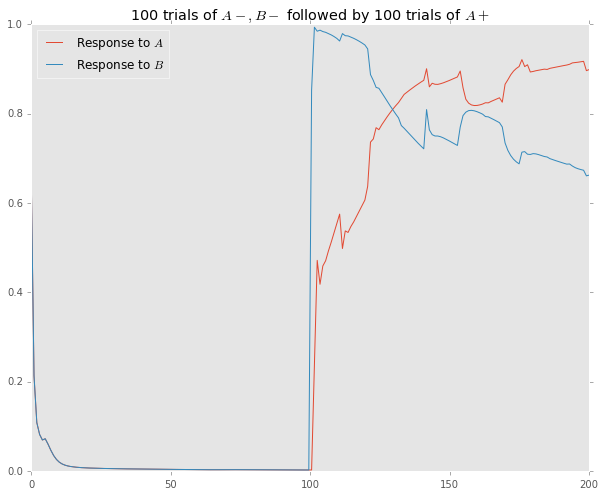

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (10, 8)
plt.style.use('ggplot')

plt.plot(np.linspace(0, 200, 200), response_A,label='Response to $A$')
plt.plot(np.linspace(0, 200, 200), response_B, label='Response to $B$')
plt.legend(loc='upper left')
plt.title('100 trials of $A-, B- $ followed by 100 trials of $A+$')
plt.axes().grid('off')

In [ ]:
hip = hippo.Hippo(20, 10)
cort = cortex.Cortex(20, 60, 1, 10)
net = network.Network(hip, cort)
inputs, outputs = construct_io()
response_A = []
response_B = []

In [ ]:
for epoch in xrange(100):
    outputs[0] = 0
    inputs[1:3] = (1, 1)
    outputs[1:3] = (1, 1)

    for trial in xrange(1,2):
        net.forward(inputs)
        net.backward(outputs)
        randomize_io(inputs, outputs)
    
    response_A.append(net.cort.outputs)
    response_B.append(net.cort.outputs)
    inputs[1:3] = (0, 0)
    outputs[1:3] = (0, 0)

    for trial in xrange(2, 10):
        net.forward(inputs)
        net.backward(outputs)
        randomize_io(inputs, outputs)

inputs[1:3] = (0, 0)
outputs[1:3] = (0, 0)
for epoch in xrange(100):
    inputs[1:3] = (1, 0)
    outputs[0:3] = (1, 1, 0)
    
    net.forward(inputs)
    net.backward(outputs, learn=False)
    randomize_io(inputs, outputs)
    
    inputs[1:3] = (0, 1)
    outputs[0:3] = (0, 0, 1)
    
    net.forward(inputs)
    net.backward(outputs, learn=False)

    inputs[1:3] = (1, 0)
    net.forward(inputs)
    response_A.append(net.cort.outputs)
    inputs[1:3] = (0,1)
    net.forward(inputs)
    response_B.append(net.cort.outputs)
    inputs[1:3] = (0, 0)

    inputs[1] = 0
    outputs[0:2] = 0

    for trial in xrange(2, 10):
        net.forward(inputs)
        net.backward(outputs, learn=False)
        randomize_io(inputs, outputs)

In [ ]:
plt.plot(np.linspace(0, 200, 200), response_A, label='Response to $A$')
plt.plot(np.linspace(0, 200, 200), response_B, label='Response to $B$')
plt.legend(loc='upper left')
plt.title('100 trials of $A-, B- $ followed by 100 trials of $A+, B-$')
plt.axes().grid('off')